This notebook will be used to calculate the solubility of silver chloride, under various conditions and assumptions. First things, import dependencies:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

Before we get to the more complicated calculations, calculate the solubility of AgCl in pure water. The overall solubility reaction is:  
$$\textrm{AgCl} \rightarrow \textrm{Ag}^{+}_{(aq)} + \textrm{Cl}^{-}_{(aq)} \qquad \textrm{K}_{sp} = 1.82 \textrm{x} 10^{-10}$$  
Probably the easiest way to do this is to write a function that can solve the quadratic equation (which I will call quad_solve), and then use it to solve for [Ag$^{+}$]. For this, using solving a quadratic equation is a little bit of overkill, but will be necessary in the next step. As a reminder, a function (whether a math function or computer function) is something that takes some inputs, manipulates them in some way, and then gives back the manipulated results. To write a function in python, we first define it (using the "def" keyword), then all the lines that are part of the function are inset 1 tab, then we use the "return" key word to tell the function what to give back.

From the ICE table we know that [Ag$^{+}$][Cl$^{-}$] = 1.82 x 10$^{-10}$, and [Ag$^{+}$] = [Cl$^{-}$], so [Ag$^{+}$]$^{2}$ = 1.82 x 10$^{-10}$. This means that, for the quadratic equation, a = 1, b = 0, and c = -1.82 x 10$^{-10}$.

In [10]:
def quad_solve(a, b, c):
    discrim = np.sqrt(b**2 - 4 * a * c)
    sol1 = (-b + discrim)/(2 * a)
    sol2 = (-b - discrim)/(2 * a)
    return [sol1,sol2]

solutions = quad_solve(1,0,-1.82E-10)
corrsol="{:.2E}".format(solutions[0])
print("The solubility of AgCl in pure water is",corrsol)

The solubility of AgCl in pure water is 1.35E-05


Now take the common ion effect into account, and calculate the solubility of AgCl in 0.1M KCl. In this case, the ICE table gives us a = 1, b = 0.1, and c = -1.82 x 10$^{-10}$. You can hopefully see why the quadratic equation solver is useful, now. You should make an ICE table to double check my numbers.

In [11]:
solutions = quad_solve(1,0.1,-1.82E-10)
corrsol="{:.2E}".format(solutions[0])
print("The solubililty of AgCl in 0.1M KCl is",corrsol)

The solubililty of AgCl in 0.1M KCl is 1.82E-09


Now graph the solubility of AgCl as a function of KCl concentration, from 0 to 0.1 M. The easiest way to graph things in python is to create a two-dimensional list of points representing x and y values. So I will use the linspace function from the numpy package to create a set of 100 points evenly distributed between 0.00001 and 0.1 to use as my x values, and then use the quadsolve function I wrote above with those x points to create the y points. I can then graph those x,y points with the plot function from the matlibpyplot package.

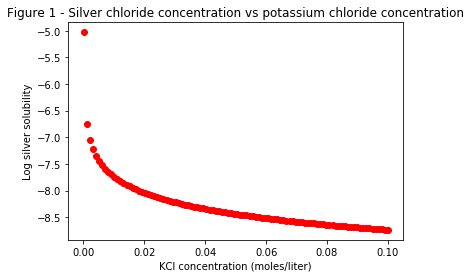

In [12]:
datapts = 100

xrange = np.linspace(.00001,0.1,num=datapts)
yrange = quad_solve(1,xrange,-1.82E-10)

plt.plot(xrange, np.log10(yrange[0]), 'ro')
plt.title("Figure 1 - Silver chloride concentration vs potassium chloride concentration")
plt.xlabel('KCl concentration (moles/liter)')
plt.ylabel('Log silver solubility')
plt.show()

Now I'm going to do this a harder way, for reasons you'll see in shortly. I'm going to use the fsolve function, from the scipy package, rather than the quadratic equation I wrote to find the solubility of [Ag$^{+}$]. The fsolve function uses an iterative process to find the solution to a set of functions, and works on non-linear functions. This will entail setting up three functions for three unknowns ([Ag$^{+}$], [Cl$^{-}$], and [K$^{+}$]). To get this working I'm going to start with just one KCl concentration, 0.1 M. Therefore, my initial state is: [Ag$^{+}$] = 0, [Cl$^{-}$] = [K$^{+}$] = 0.1 M. In addition, because fsolve requires an input that is a function, I need to write a function, which I'll call AgCl_sol, that returns three equations.

In [13]:
initAg = 0
initCl = initK = 0.1

initparams = (initAg, initCl, initK)

def AgCl_sol(concentrations):
    (Ag_conc, Cl_conc, K_conc) = concentrations
    
    firstEq = Ag_conc * Cl_conc - 1.82E-10
    secondEq = Ag_conc + K_conc - Cl_conc
    thirdEq = K_conc - K_conc
    
    return[firstEq, secondEq, thirdEq]

solution = opt.fsolve(AgCl_sol,initparams)

solubility = "{:.2E}".format(solution[0])

print("At a KCl concentration of", initK, "AgCl solubility is", solubility)

At a KCl concentration of 0.1 AgCl solubility is 1.82E-09


Now I can use the function I created above and the fsolve function to calculate and graph the solubility of AgCl in KCl, with a KCl concentration ranging from near zero to 0.1 M. I can't start at zero because I'll get weird issues with the function I wrote. Because I'm working over a large range of values, I decided to use x points that are evenly distributed along a log axis, rather than a linear axis, so I am using the logspace function from the numpy package to create my x range. Otherwise, it's fairly similar to what I did above.

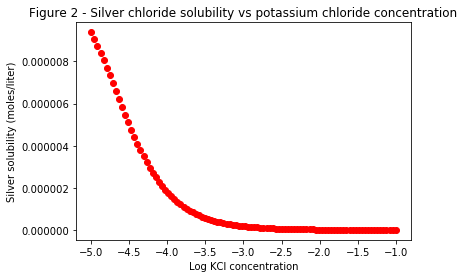

In [14]:
logxrange = np.logspace(-5,-1,num=datapts)
guess_array = tuple(zip(np.zeros(datapts),logxrange,logxrange))

out_array = []
silver_conc = []
chloride_conc = []
potassium_conc = []

for num in range(0,datapts):
    out_array.append(list(opt.fsolve(AgCl_sol,guess_array[num])))
    silver_conc.append(out_array[num][0])
    chloride_conc.append(out_array[num][1])
    potassium_conc.append(out_array[num][2])

plt.plot(np.log10(potassium_conc),silver_conc,'ro')
plt.title("Figure 2 - Silver chloride solubility vs potassium chloride concentration")
plt.xlabel('Log KCl concentration')
plt.ylabel('Silver solubility (moles/liter)')
plt.show()

That was a lot more work, and more challenging than writing a quadratic formula function, for the same answer. So, why did I go through all that work to do it with fsolve? Well, now we can use fsolve for multiple *non-linear* equations that don't reduce to a quadratic. For example, let's now add in an additional equilibrium:  
$\textrm{Ag}^{+}_{(aq)} + \textrm{2 Cl}^{-}_{(aq)} \rightarrow \textrm{AgCl}^{-}_{2(aq)} \qquad \textrm{K}_{F} = 1.78 \textrm{x} 10^{5}$  
Now to use the fsolve function to find the solubility of AgCl taking this additional equilibrium into account. First, let's just find the solubility at a single KCl concentration of 0.1 M. To do this I will need to write a new function, which I call AgCl_sol2 that returns four equations, since there are now four unknowns ([$\textrm{Ag}^{+}_{(aq)}$], [$\textrm{Cl}^{-}_{(aq)}$], [$\textrm{AgCl}^{-}_{2(aq)}$], [$\textrm{K}^{+}_{(aq)}$]).

In [15]:
initAg = initAgCl2 = 0
initCl = initK = 0.01

initparams = (initAg, initAgCl2, initCl, initK)

def AgCl_sol2(concentrations):
    (Ag_conc2, AgCl2_conc2, Cl_conc2, K_conc2) = concentrations
    
    firstEq = Ag_conc2 * Cl_conc2 - 1.82E-10
    secondEq = AgCl2_conc2 - Ag_conc2 * Cl_conc2 ** 2 * 1.78E5
    thirdEq = Ag_conc2 + K_conc2 - Cl_conc2 - AgCl2_conc2
    fourthEq = K_conc2 - K_conc2
    
    return[firstEq, secondEq, thirdEq, fourthEq]

solution = opt.fsolve(AgCl_sol2,initparams)

solubility = "{:.2E}".format(solution[0] + solution[1])

print("At a KCl concentration of", initK, "AgCl solubility is", solubility)

At a KCl concentration of 0.01 AgCl solubility is 3.42E-07


Now that it works at a single KCl concentration, we can combine what we've done so far and graph the silver solubility over a range of KCl concentrations!

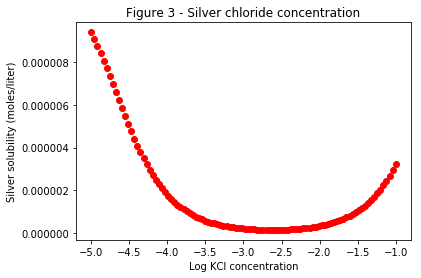

In [16]:
guess_array2 = tuple(zip(np.zeros(datapts),np.zeros(datapts),logxrange,logxrange))

out_array2 = []
silver_conc2 = []
silverchloride_conc2 = []
chloride_conc2 = []
potassium_conc2 = []

for num in range(0,datapts):
    out_array2.append(list(opt.fsolve(AgCl_sol2,guess_array2[num])))
    silver_conc2.append(out_array2[num][0])
    silverchloride_conc2.append(out_array2[num][1])    
    chloride_conc2.append(out_array2[num][2])
    potassium_conc2.append(out_array2[num][3])

total_solubility = np.add(silver_conc2, silverchloride_conc2)

plt.plot(np.log10(potassium_conc2),total_solubility,'ro')
plt.title("Figure 3 - Silver chloride concentration")
plt.xlabel('Log KCl concentration')
plt.ylabel('Silver solubility (moles/liter)')
plt.show()

Now, we see very different behavior for the solubility of silver chloride than what we predicted above, behavior that is actually consistent with what is observed experimentally. Now let's add in an additional equilibrium:  
$\textrm{AgCl}^{-}_{2(aq)} + \textrm{Cl}^{-}_{(aq)} \rightarrow \textrm{AgCl}^{2-}_{3(aq)} \qquad \textrm{K}_{F} = 2.34$  
In the box below, use the fsolve function to find the solubility of AgCl taking this third equilibrium into account, similar to the work above. First, just find the solubility at a single KCl concentration of 0.1 M. To do this you will need to write a new function that returns five equations, since there are now five unknowns.

Now that you can find the solubility of AgCl at a single KCl concentration, graph the silver solubility for KCl concentrations from 10$^{-5}$ M to 10$^{-1}$ M, similar to above.

Using the graph you have just produced, *estimate* the KCl concentration that results in the lowest silver solubility: